In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# For Visualization
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
def warns(*args,**kwargs): pass
warnings.warn=warns

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/crop-recommendation-dataset/Crop_recommendation.csv


# **Data Loading**

In [2]:
df = pd.read_csv('/crop-recommendation-dataset/Crop_recommendation.csv')
print('Data Shape: ', df.shape)

Data Shape:  (2200, 8)


In [3]:
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


## **EDA**

In [4]:
df.isna().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [5]:
# Unique Name of the Crops in Dataset
crops = df['label'].unique()
crops.sort()
print ("Total Number of Crops Data: ", len(crops) )
print("\n","-"*20, " List of Crops ", "-"*20)
crops.tolist()

Total Number of Crops Data:  22

 --------------------  List of Crops  --------------------


['apple',
 'banana',
 'blackgram',
 'chickpea',
 'coconut',
 'coffee',
 'cotton',
 'grapes',
 'jute',
 'kidneybeans',
 'lentil',
 'maize',
 'mango',
 'mothbeans',
 'mungbean',
 'muskmelon',
 'orange',
 'papaya',
 'pigeonpeas',
 'pomegranate',
 'rice',
 'watermelon']

In [6]:
# Number of Rows against each Crop
print("Number of Records Against Eash Crop")
print("-"*35)
print(df['label'].value_counts() )

Number of Records Against Eash Crop
-----------------------------------
rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: label, dtype: int64


In [7]:
#Columns Name
df.columns

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label'], dtype='object')

In [8]:
# Features Selection
selected_features = {'N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall'}
selected_features

{'K', 'N', 'P', 'humidity', 'ph', 'rainfall', 'temperature'}

### **Correlation**

In [9]:
corr = df.corr()
corr

,N,P,K,temperature,humidity,ph,rainfall
N,1.000000,-0.231460,-0.140512,0.026504,0.190688,0.096683,0.059020
P,-0.231460,1.000000,0.736232,-0.127541,-0.118734,-0.138019,-0.063839
K,-0.140512,0.736232,1.000000,-0.160387,0.190859,-0.169503,-0.053461
temperature,0.026504,-0.127541,-0.160387,1.000000,0.205320,-0.017795,-0.030084
humidity,0.190688,-0.118734,0.190859,0.205320,1.000000,-0.008483,0.094423
ph,0.096683,-0.138019,-0.169503,-0.017795,-0.008483,1.000000,-0.109069
rainfall,0.059020,-0.063839,-0.053461,-0.030084,0.094423,-0.109069,1.000000


<AxesSubplot:title={'center':'Features Correlation'}>

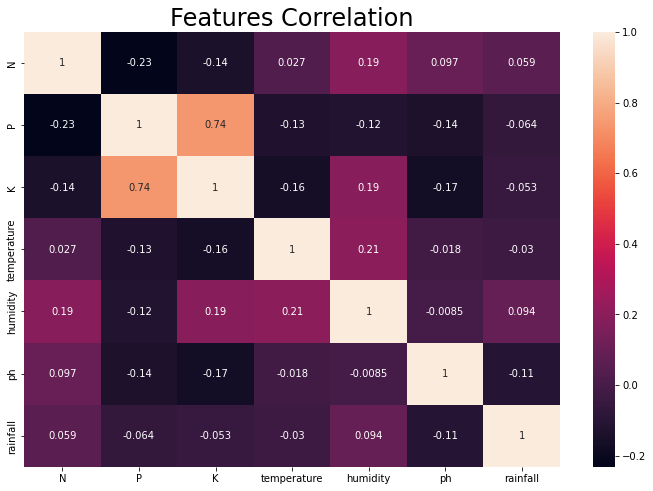

In [10]:
plt.figure(figsize=(12,8))
plt.title("Features Correlation", fontsize=24)
sns.heatmap(corr, annot=True)

# **Features Visualization**

### **Comparispon of Each Features with Crops**

In [11]:
# Barplot Function for Compasison Graph
def crop_relation_visual(yfeature):
    ax = sns.set_style('whitegrid')
    plt.subplots(figsize=(15,8))

    ax = sns.barplot(x="label", y=yfeature, data=df, ci=None)
    ax.bar_label(ax.containers[0], fontsize=12)

    plt.xticks(rotation=90, fontsize=14)
    plt.yticks(rotation=0, fontsize=14)
    plt.title("Crops Relation with " + str(yfeature), fontsize = 24)
    plt.xlabel("Crops Name", fontsize = 18)
    plt.ylabel("values of " + str(yfeature), fontsize = 18)

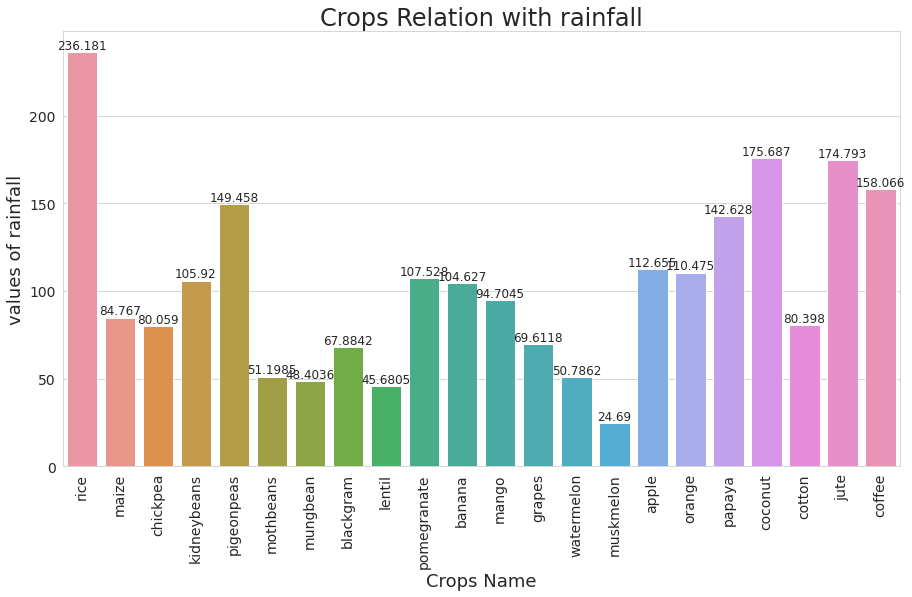

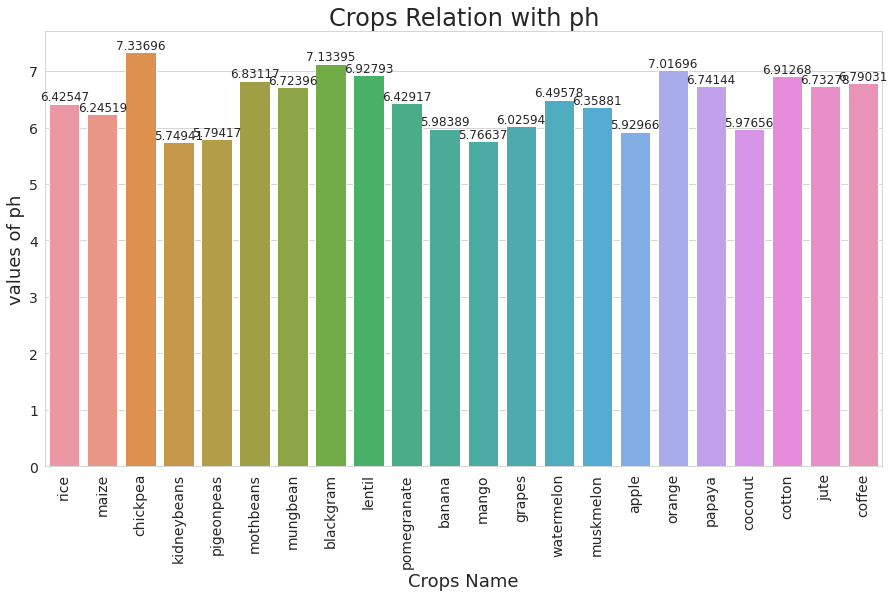

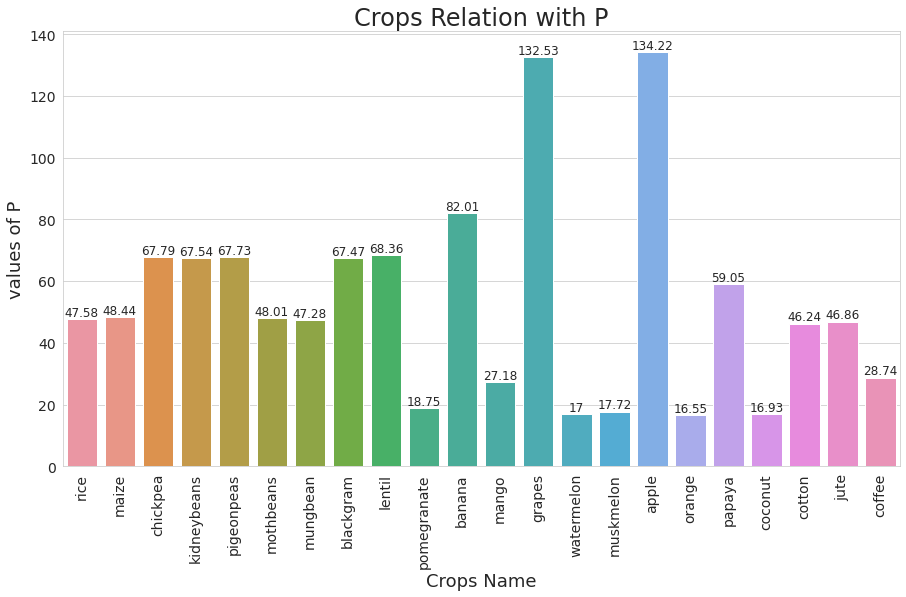

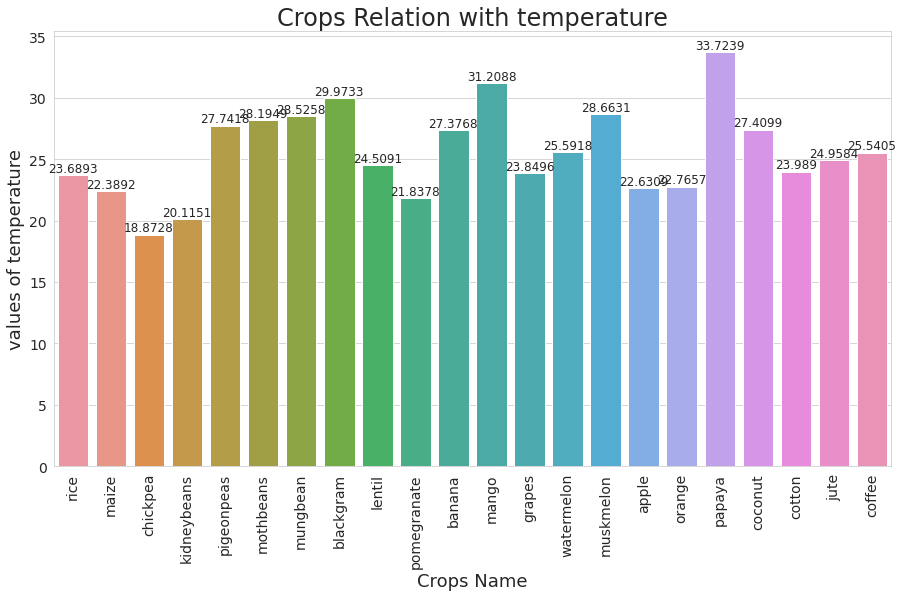

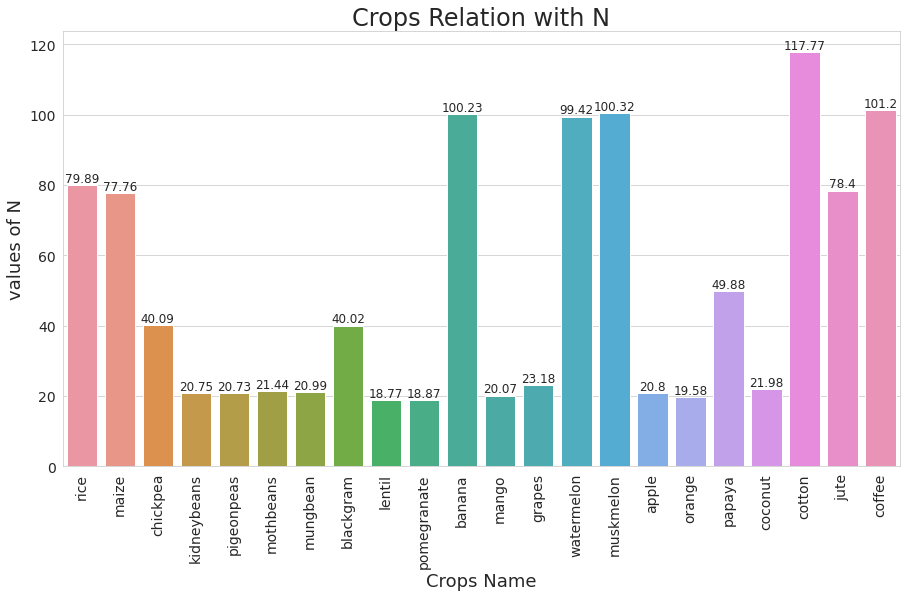

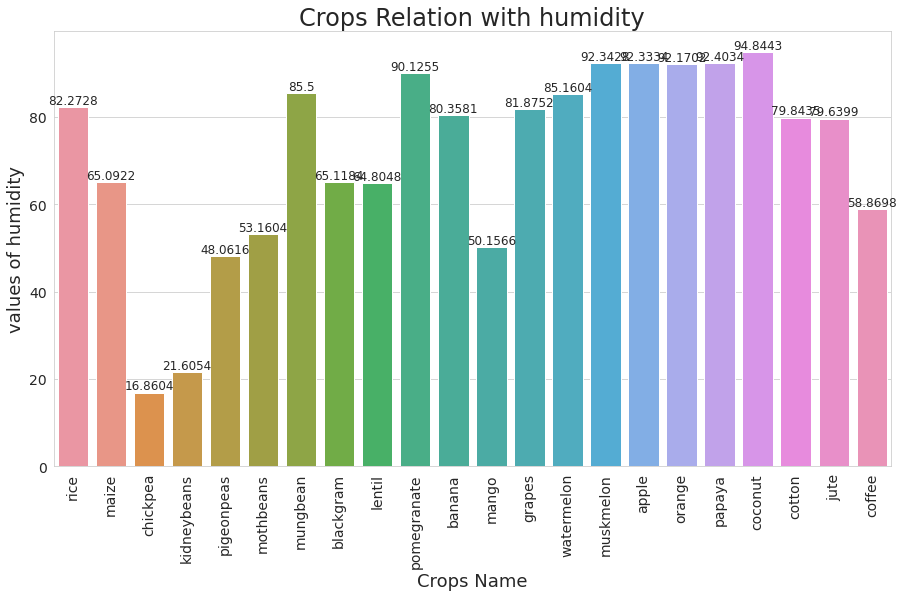

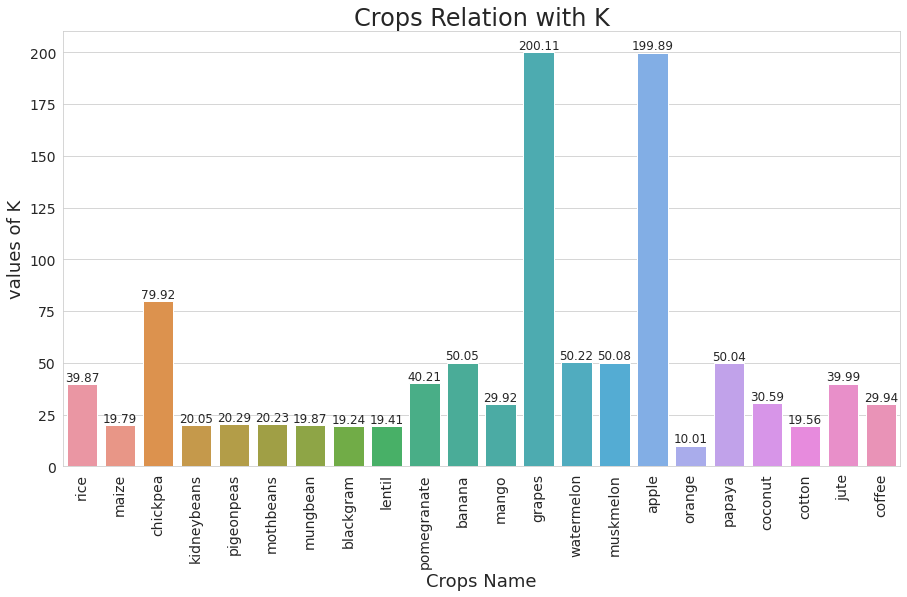

In [12]:
for x in selected_features:
    crop_relation_visual(x)

### **Statistic Visualization of each Feature of the Crops**

In [13]:
# Boxplot for Statistic Viusalization of each Features
def crop_boxplot_visual(yfeature):
    ax = sns.set_style('whitegrid')
    plt.subplots(figsize=(15,8))
    sns.boxplot(x=yfeature, y="label", data=df)

    plt.title("Crops Relation with " + str(yfeature), fontsize = 24)
    plt.xlabel("values of " + str(yfeature), fontsize = 18)
    plt.ylabel("Crops Name", fontsize = 18)

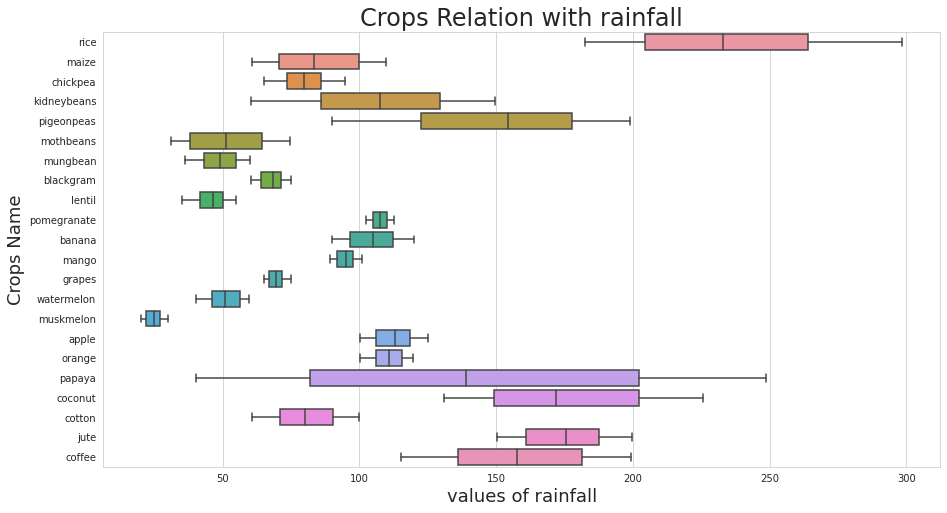

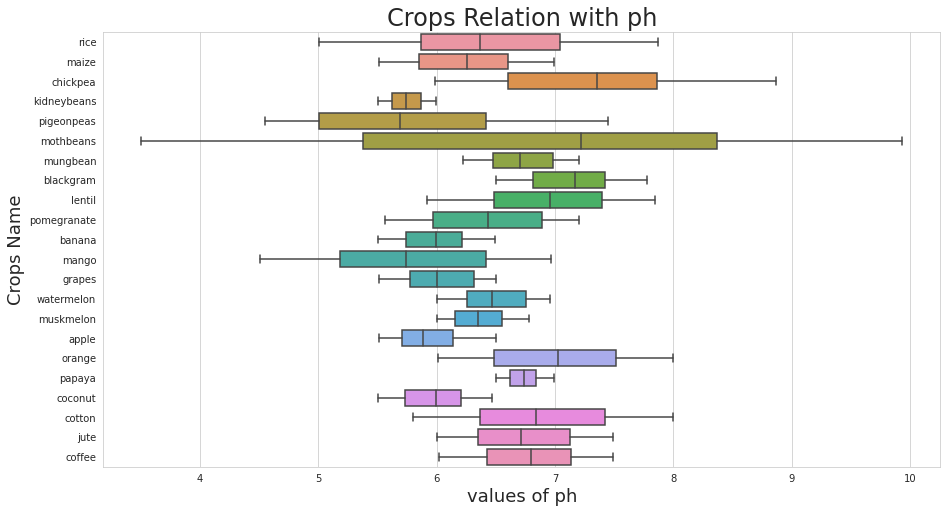

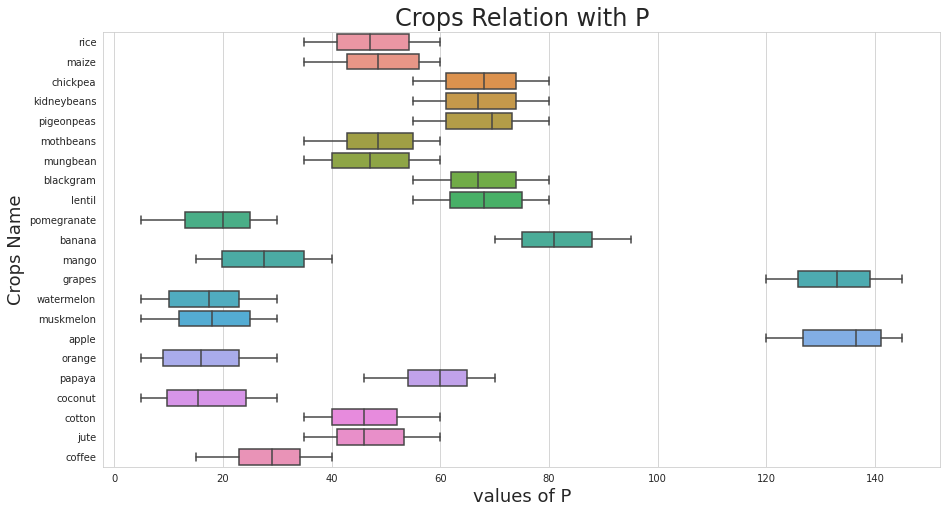

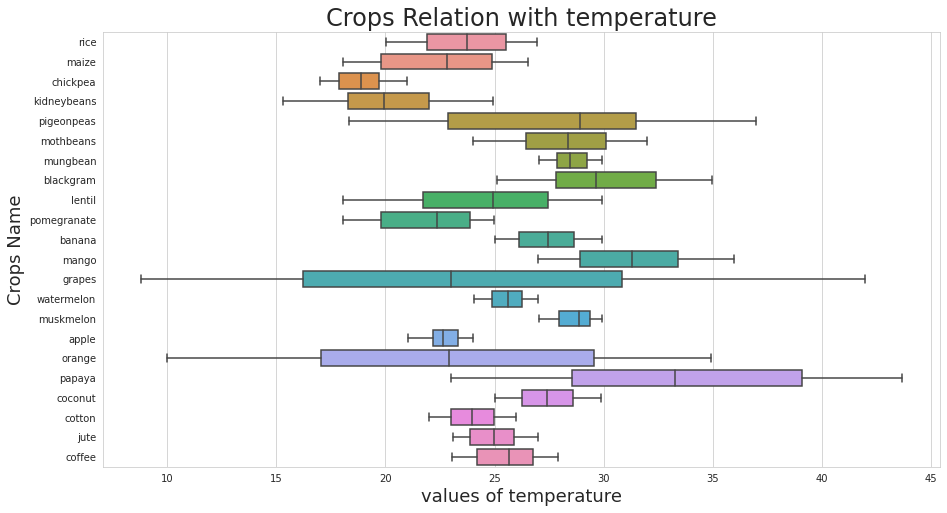

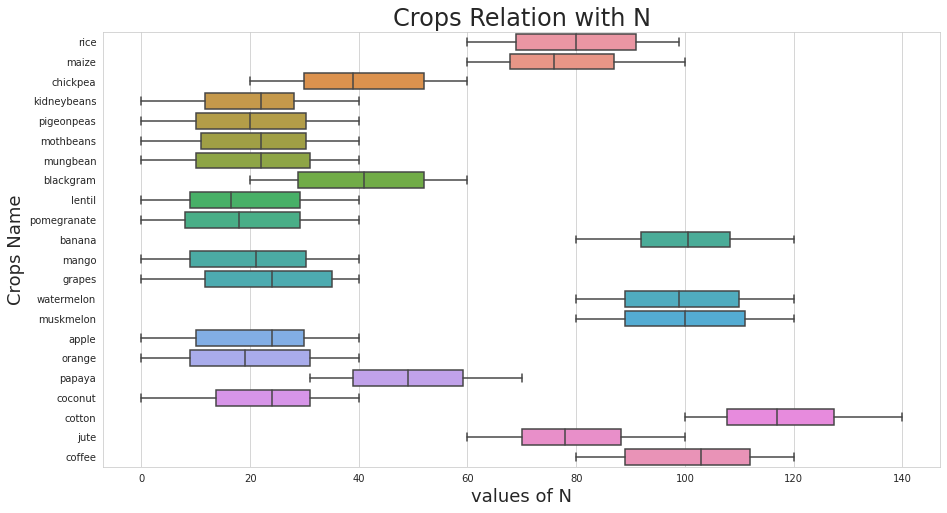

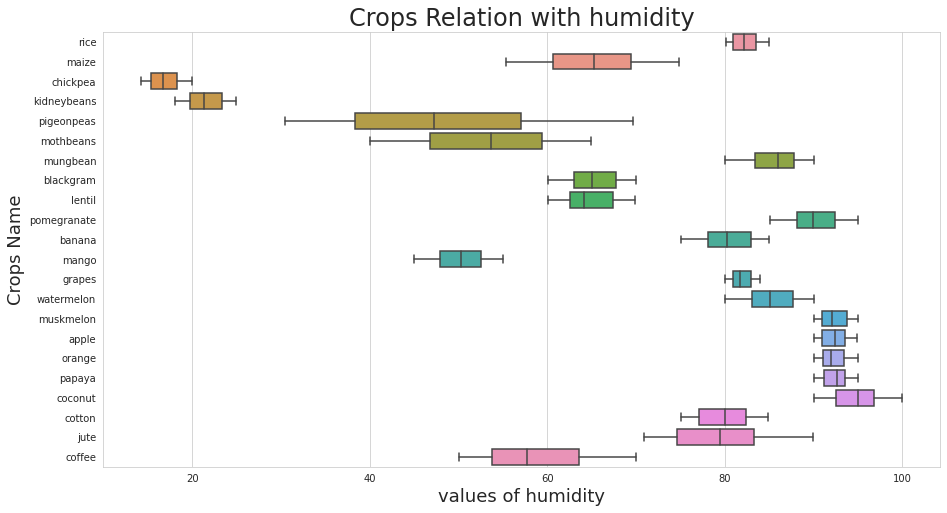

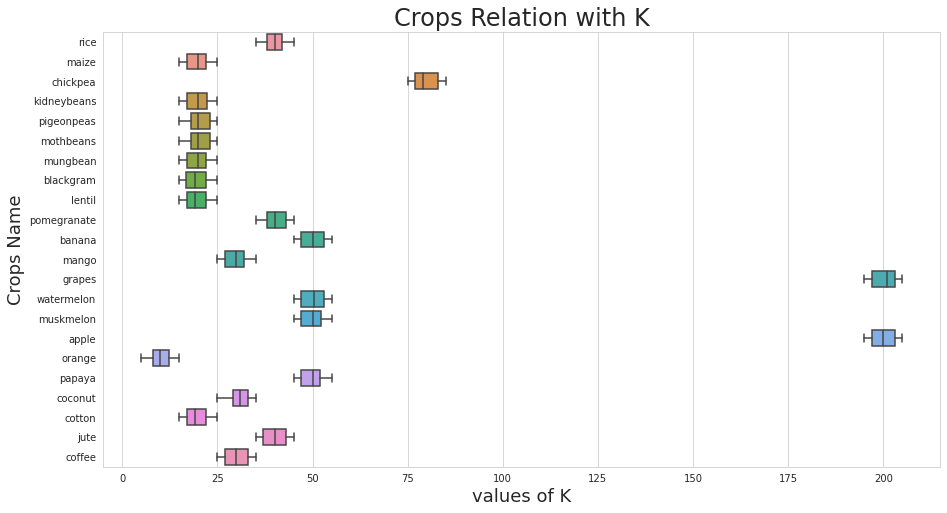

In [14]:
for x in selected_features:
    crop_boxplot_visual(x)

In [15]:
# Line Plot Function of the Crops Features
def crop_lineplot_visual(yfeature):
    ax = sns.set_style('whitegrid')
    plt.subplots(figsize=(14, 8))
    
    sns.lineplot(x=yfeature, y="label", data=df, ci=None)

    plt.xticks(rotation=90, fontsize=14)
    plt.yticks(rotation=0, fontsize=14)
    plt.title("Crops Relation with " + str(yfeature), fontsize = 24)
    plt.xlabel("values of " + str(yfeature), fontsize = 18)
    plt.ylabel("Crops Name", fontsize = 18)

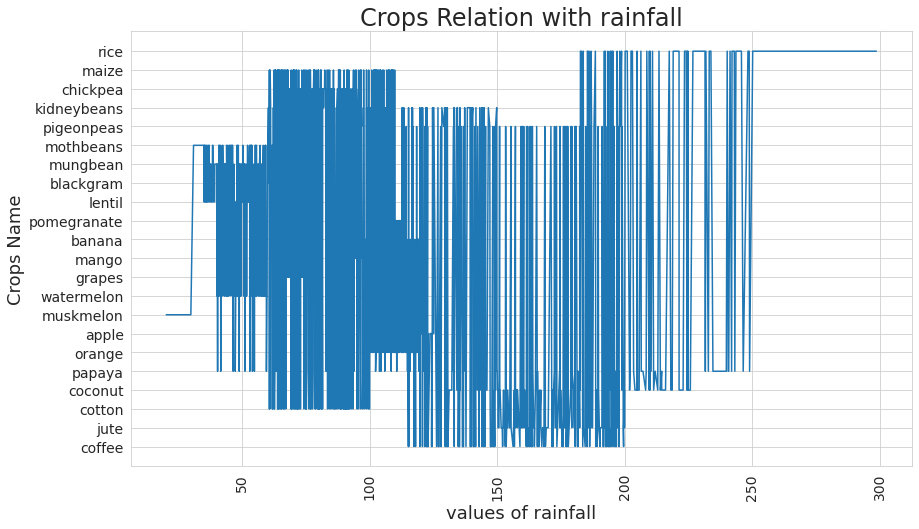

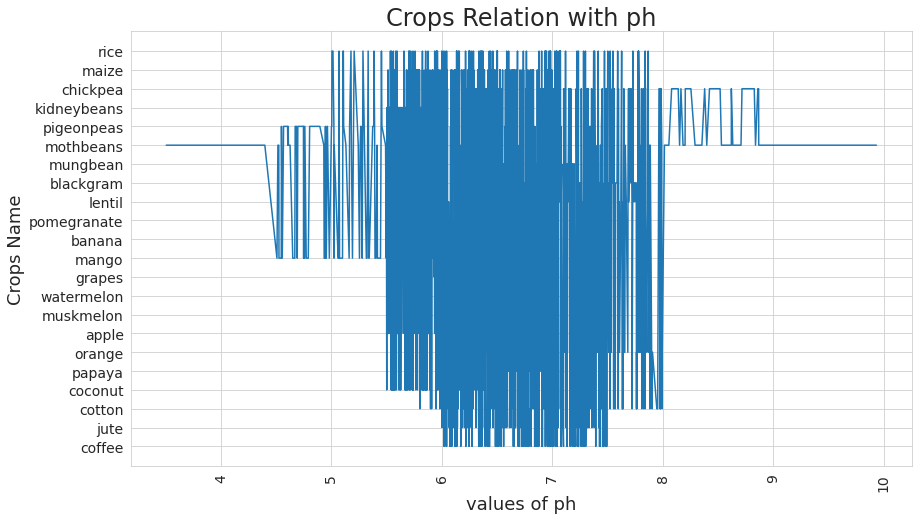

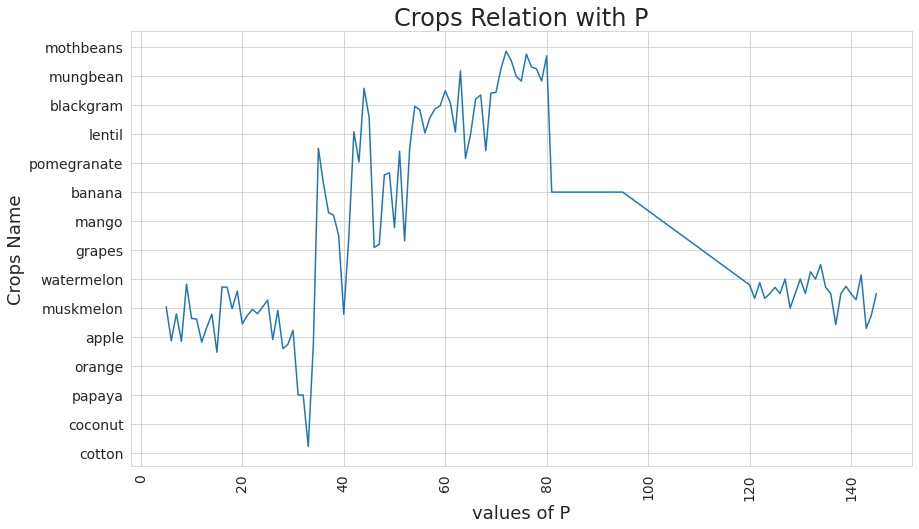

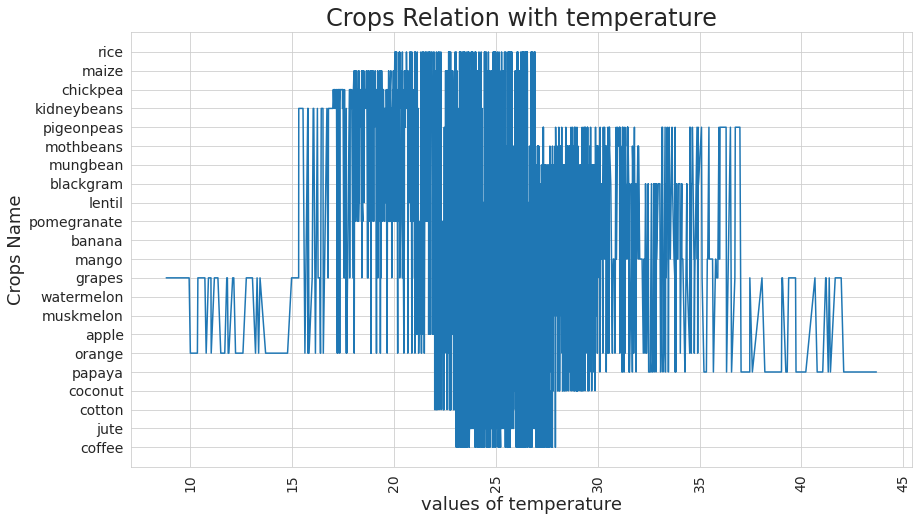

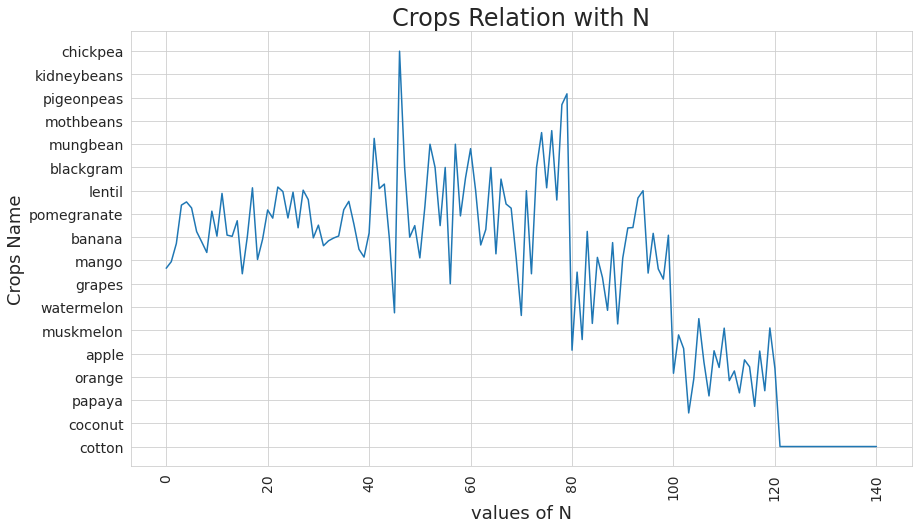

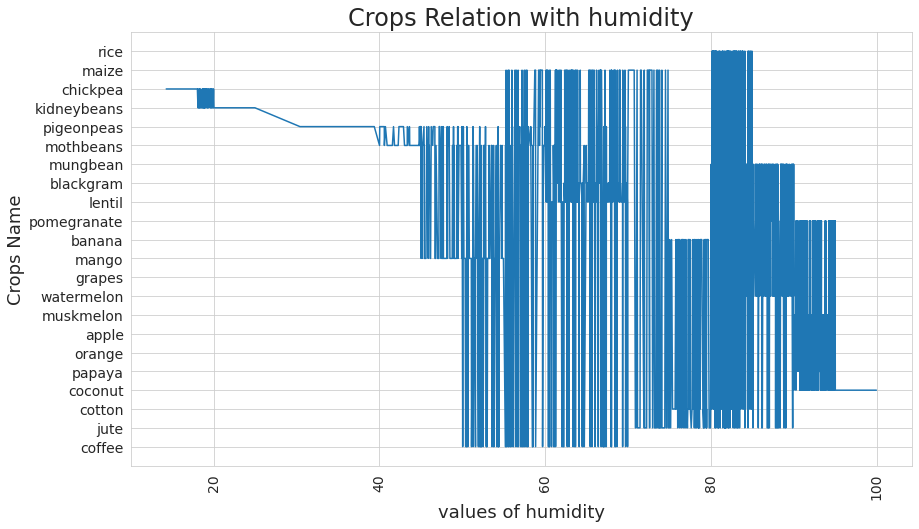

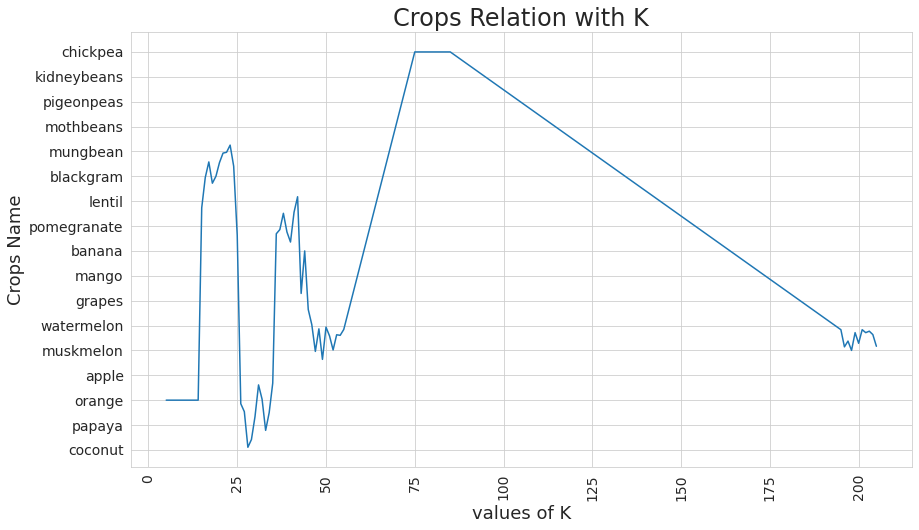

In [16]:
for x in selected_features:
    crop_lineplot_visual(x)

In [17]:
xdf = df.copy()
xdf

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice
...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee


# **Modeling**

In [18]:
from sklearn.preprocessing import LabelEncoder 
labelencoder= LabelEncoder() # initializing an object of class LabelEncoder

#Fit and Transforming the label column.
xdf['label_codes'] = labelencoder.fit_transform(xdf['label']) 
xdf

,N,P,K,temperature,humidity,ph,rainfall,label,label_codes
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice,20
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice,20
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice,20
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice,20
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice,20
...,...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee,5
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee,5
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee,5
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee,5


In [19]:
y = xdf['label_codes'] # Targeted Values Selection
X = xdf[selected_features] # Independent Values

In [20]:
# Data Splitting
from sklearn.metrics import mean_squared_error, accuracy_score, precision_score, recall_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [21]:
#Initilizing Arrays for Accuracy Measure
accuracy_train = []
accuracy_test = []
model_name = []

## **Linear Model**

In [22]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

# Fit Train Data in Model
lr.fit(X_train, y_train)

LinearRegression()

#### **Prediction and Accuracy Measure**

In [23]:
# Train Dataset
predict_linear_train = lr.predict(X_train)
MSE_linear_train = ( mean_squared_error(y_train, predict_linear_train)  )

accuracy_linear_train = 100 - MSE_linear_train
print("Train Accuracy: ", accuracy_linear_train)

Train Accuracy:  72.02531915343357


In [24]:
# Test Dataset
predict_linear_test = lr.predict(X_test)
MSE_linear_test = ( mean_squared_error(y_test, predict_linear_test)  )
accuracy_linear_test = 100 - MSE_linear_test
print("Test Accuracy: ", accuracy_linear_test)

# Save Accuracy Measure against Model Name
accuracy_train.append( accuracy_linear_train )
accuracy_test.append( accuracy_linear_test )
model_name.append('Linear Regression')

Test Accuracy:  70.8085237298792


## **Random Forest Model**

In [25]:
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
oversample = SMOTE()

features, labels = oversample.fit_resample(xdf.drop(["label", "label_codes"], axis=1), xdf['label_codes'])

In [26]:
rf = RandomForestClassifier(n_estimators=15, random_state=0 )

# Fit Dataset in Model
rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=15, random_state=0)

#### **Prediction and Accuracy**

In [27]:
# Prediction of Train and Test Dataset
random_predict_train = rf.predict(X_train)
random_predict_test = rf.predict(X_test)

Train Accuracy : 100.00 %
Test Accuracy  : 99.09 %
Precision      : 99.09 %
Recall         : 99.09 %


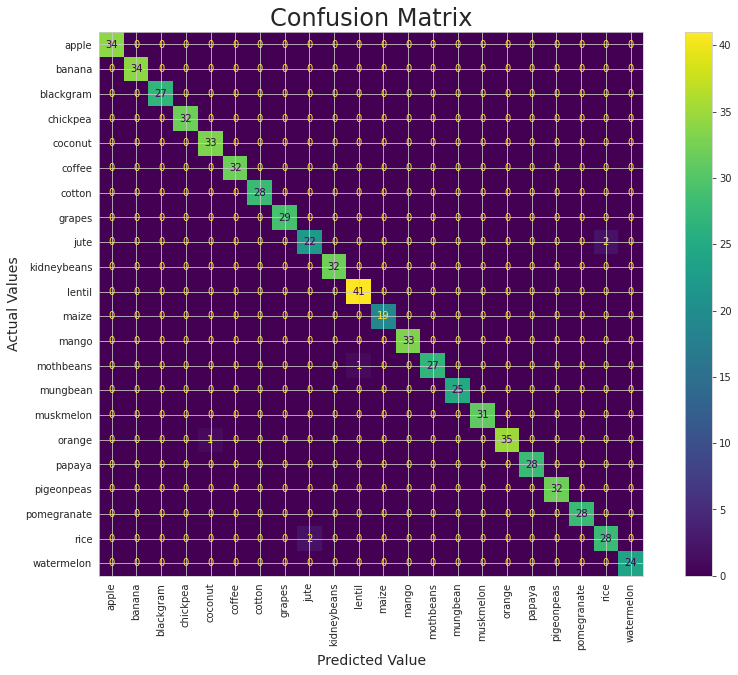

In [28]:
# Accuracy of Train and Test Dataset

print("Train Accuracy : {:.2f} %".format(accuracy_score( y_train, random_predict_train) * 100) )
print("Test Accuracy  : {:.2f} %".format(accuracy_score( random_predict_test, y_test) * 100) )

print("Precision      : {:.2f} %".format(precision_score( random_predict_test, y_test, average = "micro") * 100) )
print("Recall         : {:.2f} %".format(recall_score( random_predict_test, y_test, average = "micro") * 100) )

# Save Accuracy Measure against Model Name
accuracy_train.append( accuracy_score(random_predict_train, y_train) * 100 )
accuracy_test.append( accuracy_score(random_predict_test, y_test) * 100 )
model_name.append('RandomForest Regression')

# Confusion Matrix
cm = confusion_matrix(random_predict_test, y_test)
disp = ConfusionMatrixDisplay( confusion_matrix = cm, display_labels = [labelencoder.classes_[i] for i in rf.classes_] )
fig, ax = plt.subplots( figsize = (15,10) )
disp.plot(ax = ax)
plt.title("Confusion Matrix", fontsize=24)
plt.xlabel("Predicted Value", fontsize=14)
plt.ylabel("Actual Values", fontsize=14)
plt.xticks(rotation=90)
plt.show()

## **Decision Tree Model**

In [29]:
# Import Library for Decision Tree Model
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [30]:
dt_pipeline = make_pipeline( StandardScaler(), DecisionTreeClassifier( criterion = "entropy", random_state = 2, max_depth = 5) )
dt_pipeline.fit(X_train, y_train) # Fit Dataset in Model

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('decisiontreeclassifier',
                 DecisionTreeClassifier(criterion='entropy', max_depth=5,
                                        random_state=2))])

Accuracy on Test Data: 94.48051948051948%


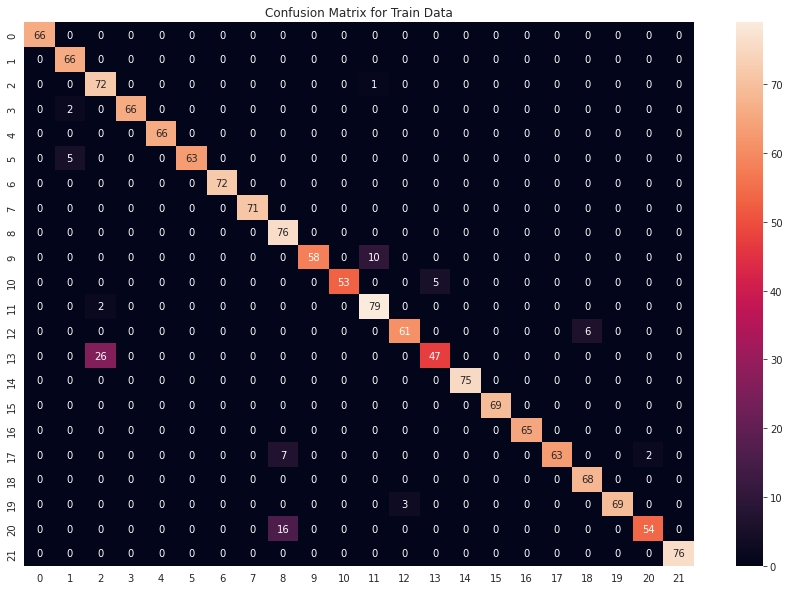

In [31]:
# Accuray On Test Data
decision_predict_train = dt_pipeline.predict(X_train)
decision_accuracy_train = accuracy_score(y_train, decision_predict_train)
print(f"Accuracy on Test Data: {decision_accuracy_train * 100}%")

# View Confusion Matrix
plt.figure(figsize = (15,10))
sns.heatmap(confusion_matrix(y_train, decision_predict_train), annot = True)
plt.title("Confusion Matrix for Train Data")
plt.show()

Accuracy on Test Data: 93.48484848484848%


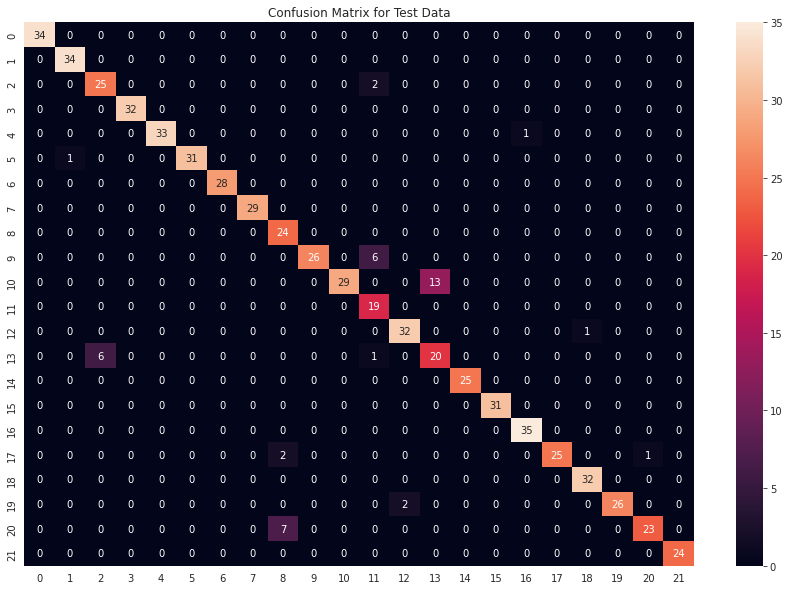

In [32]:
# Accuray On Test Data
decision_predict_test = dt_pipeline.predict(X_test)
decision_accuracy_test = accuracy_score(y_test, decision_predict_test)
print(f"Accuracy on Test Data: {decision_accuracy_test * 100}%")

# Save Accuracy Measure against Model Name
accuracy_train.append( (decision_accuracy_train) * 100 )
accuracy_test.append( (decision_accuracy_test) * 100 )
model_name.append('Decision Tree')

# View Confusion Matrix 
plt.figure(figsize = (15, 10))
sns.heatmap(confusion_matrix(y_test, decision_predict_test), annot = True)
plt.title("Confusion Matrix for Test Data")
plt.show()

## **XG Boost Model**

In [33]:
# Import Library
import xgboost
from xgboost import XGBClassifier

xgb_pipeline = make_pipeline( StandardScaler(), XGBClassifier(random_state = 18) )
xgb_pipeline.fit(X_train, y_train) # Fit Data

[04:12:06] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('xgbclassifier',
                 XGBClassifier(base_score=0.5, booster='gbtree',
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=1, enable_categorical=False,
                               gamma=0, gpu_id=-1, importance_type=None,
                               interaction_constraints='',
                               learning_rate=0.300000012, max_delta_step=0,
                               max_depth=6, min_child_weight=1, missing=nan,
                               monotone_constraints='()', n_estimators=100,
                               n_jobs=4, num_parallel_tree=1,
                               objective='multi:softprob', predictor='auto',
                               random_state=18, reg_alpha=0, reg_lambda=1,
                               scale_pos_weight=None, subsample=1,
                               tree_method='exact', vali

Accuracy on Train Data: 100.0%


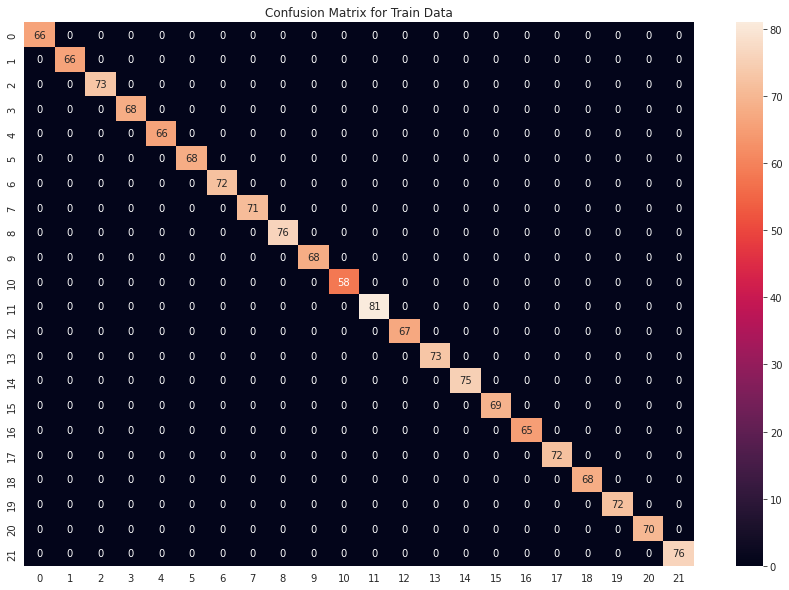

In [34]:
# Accuray On Test Data
xgb_predict_train = xgb_pipeline.predict(X_train)
xgb_accuracy_train = accuracy_score( y_train, xgb_predict_train )
print(f"Accuracy on Train Data: {xgb_accuracy_train * 100}%")

# Show Confusion Matrix
plt.figure(figsize = (15, 10))
sns.heatmap(confusion_matrix(y_train, xgb_predict_train), annot = True)
plt.title("Confusion Matrix for Train Data")
plt.show()

Accuracy on Test Data: 98.63636363636363%


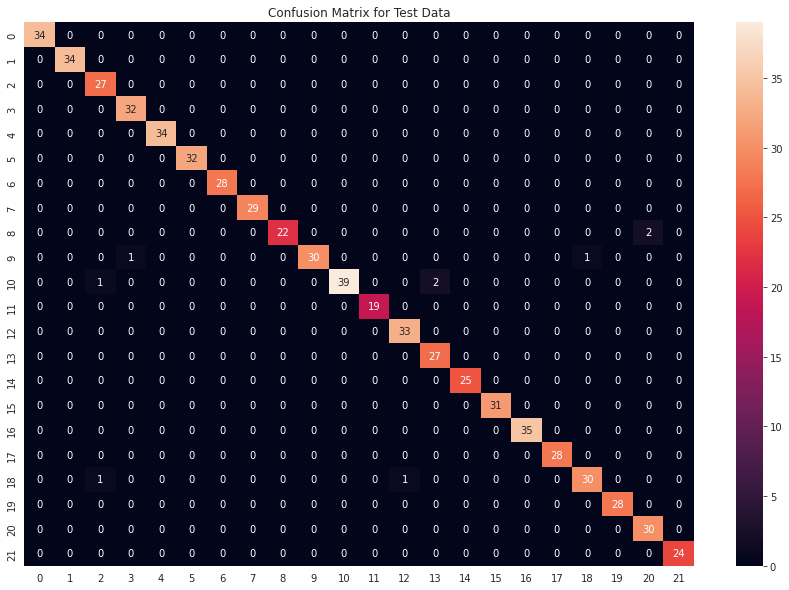

In [35]:
# Accuray On Test Data
xgb_predict_test = xgb_pipeline.predict(X_test)
xgb_accuracy_test = accuracy_score(y_test, xgb_predict_test)
print(f"Accuracy on Test Data: {xgb_accuracy_test * 100}%")

# Save Accuracy Measured against Model Name 
accuracy_train.append( (xgb_accuracy_train) * 100 )
accuracy_test.append( (xgb_accuracy_test) * 100 )
model_name.append('XGBoost')

# Confusion Matrix
plt.figure(figsize = (15, 10))
sns.heatmap(confusion_matrix(y_test, xgb_predict_test), annot = True)
plt.title("Confusion Matrix for Test Data")
plt.show()

##### **Create Dataset for Accuracy**

In [36]:
# Create New Dataset for Accuracy Measure
dftable = pd.DataFrame(columns={'accuracy_train', 'accuracy_test', 'model_name'})
dftable['accuracy_train'] = accuracy_train
dftable['accuracy_test'] = accuracy_test
dftable['model_name'] = model_name
dftable = dftable[['model_name', 'accuracy_train', 'accuracy_test']]
dftable

,model_name,accuracy_train,accuracy_test
0,Linear Regression,72.025319,70.808524
1,RandomForest Regression,100.000000,99.090909
2,Decision Tree,94.480519,93.484848
3,XGBoost,100.000000,98.636364


### **Accuracy Visualization**

Text(0.5, 0, 'Model Names')

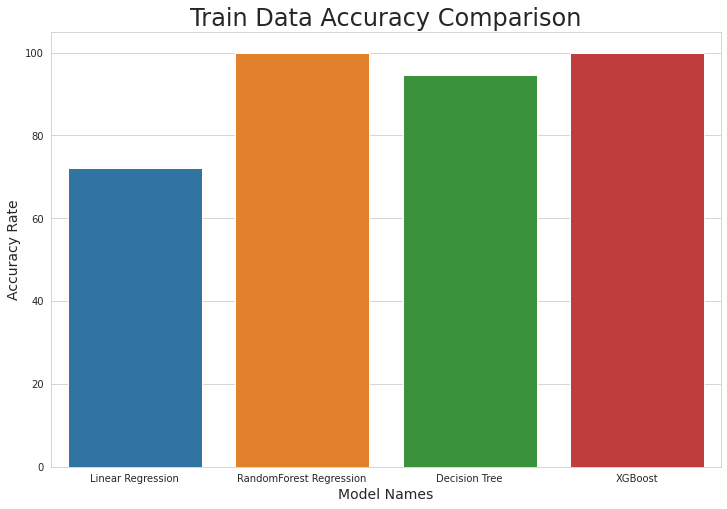

In [37]:
plt.figure( figsize=[12, 8])
sns.barplot( x = 'model_name', y = 'accuracy_train', data = dftable )
plt.title( 'Train Data Accuracy Comparison', fontsize=24 )
plt.ylabel( 'Accuracy Rate', fontsize=14 )
plt.xlabel( 'Model Names', fontsize=14 )


Text(0.5, 0, 'Model Names')

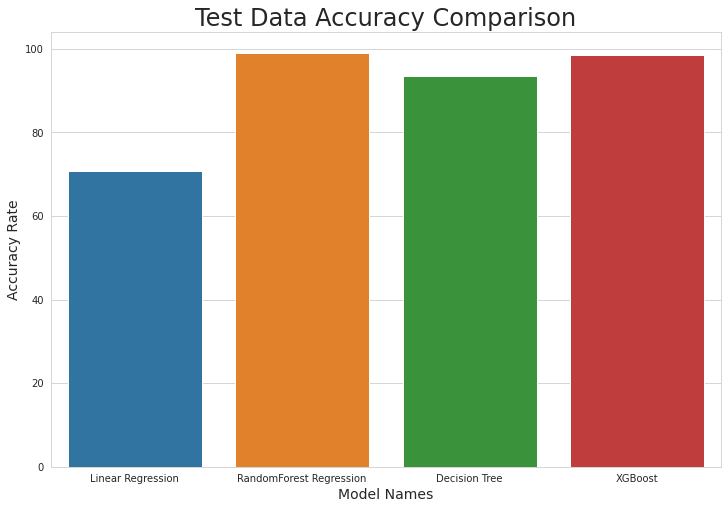

In [38]:
plt.figure( figsize=[12, 8])
sns.barplot( x = 'model_name', y = 'accuracy_test', data = dftable )
plt.title( 'Test Data Accuracy Comparison', fontsize=24 )
plt.ylabel( 'Accuracy Rate', fontsize=14 )
plt.xlabel( 'Model Names', fontsize=14 )

In [39]:
dftable

,model_name,accuracy_train,accuracy_test
0,Linear Regression,72.025319,70.808524
1,RandomForest Regression,100.000000,99.090909
2,Decision Tree,94.480519,93.484848
3,XGBoost,100.000000,98.636364


* #### as per above comparision help in model selection<br>
## Welcome and appreciate your vote and comments
# **Good Luck**
<img src="https://seeklogo.com/images/S/Smile-logo-A18DBD791A-seeklogo.com.png" width="80" height="80">